In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df.shape

(50000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
print(df['sentiment'].value_counts())

positive    25000
negative    25000
Name: sentiment, dtype: int64


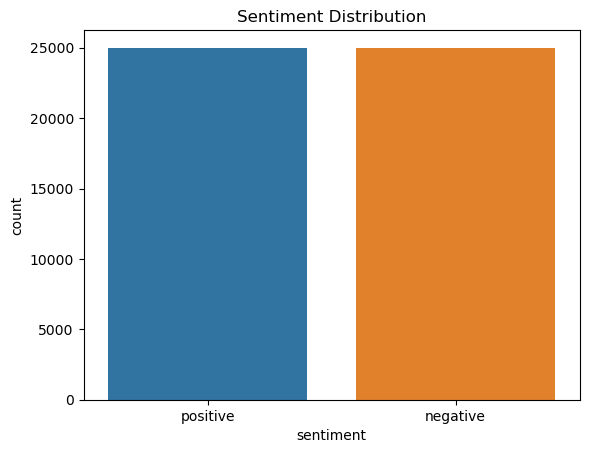

In [7]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [8]:
df_pos = df[df['sentiment']=='positive'].copy()
df_neg = df[df['sentiment']=='negative'].copy()

In [11]:
import wordcloud
from matplotlib import pyplot as plt

def show_wordcloud(data, title):
    review = " ".join(data['review'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color = 'lightgrey', 
                                        colormap = 'viridis', width= 800, height = 600).generate(review)
    plt.figure(figsize=(10, 7), frameon = True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize = 20)
    plt.show()
    

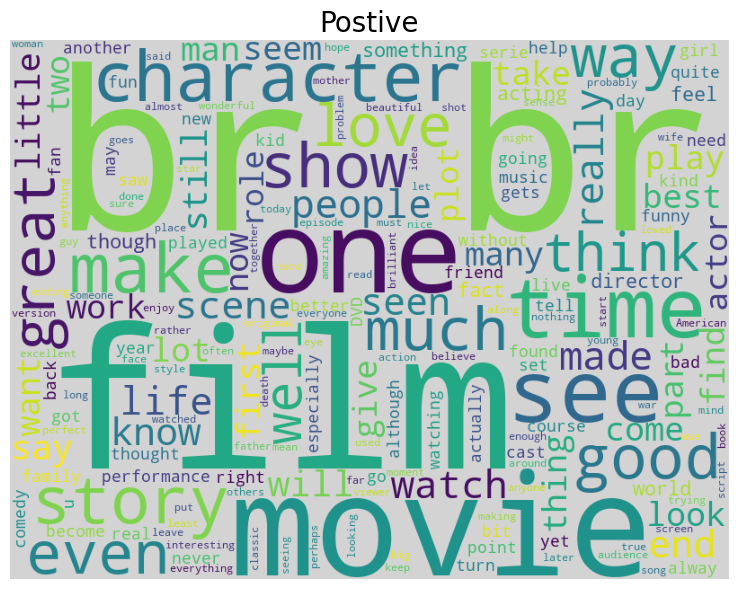

In [12]:
show_wordcloud(df_pos, 'Postive')

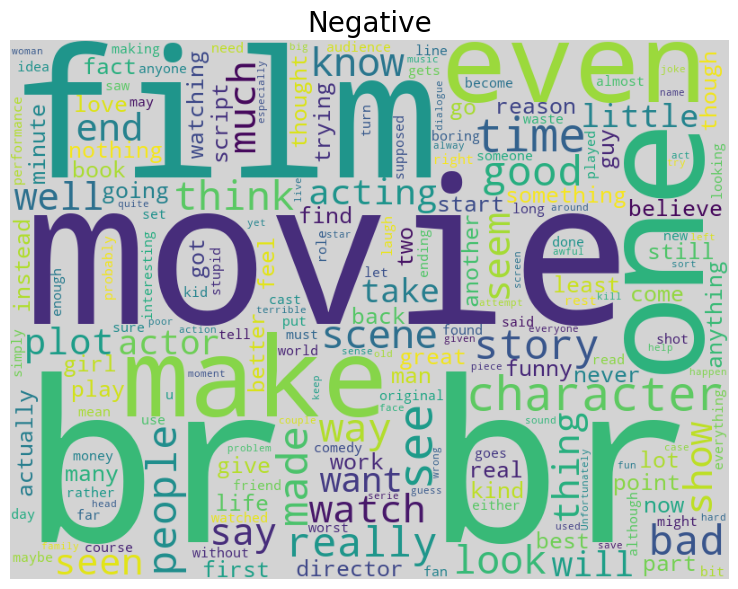

In [13]:
show_wordcloud(df_neg, 'Negative')

In [14]:
import nltk
import re
import string
import contractions
from cleantext import clean
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize tools
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
wn = WordNetLemmatizer()

# Function to preprocess text
def text_preprocessing(mystr):
    mystr = mystr.lower()  # Case folding
    mystr = re.sub('\w*\d\w*', '', mystr)  # Remove digits
    mystr = re.sub('\n', ' ', mystr)  # Replace new line characters with space
    mystr = re.sub('[‘’“”…]', '', mystr)  # Remove quotes
    mystr = re.sub('<.*?>', '', mystr)  # Remove HTML tags
    mystr = re.sub(r'\[.*?\]', '', mystr)  # Remove text in square brackets
    mystr = re.sub('https?://\S+|www.\.\S+', '', mystr)  # Remove URLs
    mystr = clean(mystr, no_emoji=True)  # Remove emojis
    mystr = ''.join([c for c in mystr if c not in string.punctuation])  # Remove punctuation
    mystr = ' '.join([contractions.fix(word) for word in mystr.split()])  # Expand contractions
    
    # Tokenize, remove stopwords, and lemmatize
    tokens = word_tokenize(mystr)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [wn.lemmatize(token) for token in tokens]
    new_str =  ' '.join(tokens)
    return new_str



In [15]:
X = df['review']
y = df['sentiment']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, shuffle=True)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([
    ('bow', CountVectorizer(preprocessor=text_preprocessing)),
    ('model', MultinomialNB())])
type(pipe)


sklearn.pipeline.Pipeline

In [26]:
pipe.fit(X=X_train, y=y_train)



Pipeline(steps=[('bow',
                 CountVectorizer(preprocessor=<function text_preprocessing at 0x000001C29D143D80>)),
                ('model', MultinomialNB())])

In [21]:
new = ['that was really amazing']
pipe.predict(new)

array(['positive'], dtype='<U8')

In [22]:
new = ['that was a waste of time']
pipe.predict(new)

array(['negative'], dtype='<U8')

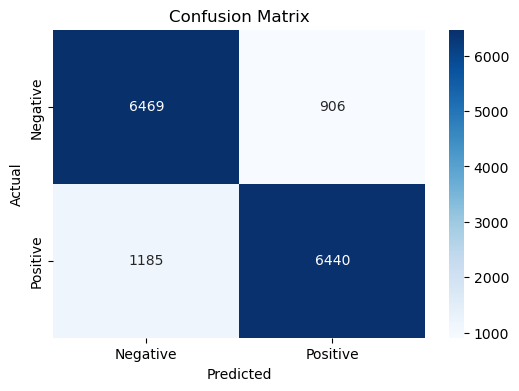

Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.88      0.86      7375
    positive       0.88      0.84      0.86      7625

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Make predictions on the test set
y_pred = pipe.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


In [30]:
import joblib
joblib.dump(pipe, 'r_model.pkl')

['r_model.pkl']